# PyDataML
## PyData Tokyo tutorial Machine Learning
- https://github.com/PyDataTokyo/pydata-tokyo-tutorial-1
- https://pydata.tokyo/ipynb/tutorial-1/ml.html
- https://github.com/PyDataTokyo/pydata-tokyo-tutorial-1/blob/master/pydatatokyo_tutorial_dh.ipynb
- https://github.com/PyDataTokyo/pydata-tokyo-tutorial-1/blob/master/pydatatokyo_tutorial_ml.ipynb

## Data
https://www.kaggle.com/c/titanic-gettingStarted/data

## アジェンダ
- バックグラウンド
- ライブラリのインポートとデータの準備
- ジェンダーモデルによる生存者推定、推定値の評価
- ロジスティック回帰による生存者推定
- 交差検証（クロスバリデーション）
- 決定木（Decision Tree）による生存者推定
- グリッドサーチ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)
from sklearn.cross_validation import (
    train_test_split, 
    cross_val_score, 
    KFold
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier, 
    export_graphviz
)
from sklearn.grid_search import GridSearchCV

from matplotlib.colors import ListedColormap
from IPython.display import Image


In [439]:
def estimated_params(estimator):
    return [a for a in dir(estimator) if a.endswith("_") and not a.startswith("_")]

In [3]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [4]:
df_train.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.describe(include="all", percentiles=[0.05] + list(np.linspace(0.1, 0.9, 9)) + [0.95])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kilgannon, Mr. Thomas J",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
5%,45.500000,0.000000,1.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN,7.225000,NaN,NaN
10%,90.000000,0.000000,1.000000,NaN,NaN,14.000000,0.000000,0.000000,NaN,7.550000,NaN,NaN
20%,179.000000,0.000000,1.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,7.854200,NaN,NaN


## 変数概要
- PassengerId: 乗客ID
- Survived: 1 = 生き残り 0 = 死亡
- Pclass: 等級
- Name: 名前
- Sex: 性別
- Age: 年齢
- Parch: 子供の数
- Ticket: チケット番号
- Fare: 運賃
- Cabin: 部屋番号
- Embarked: 乗船地

## わかったこと
- 891レコード
- 70%が死んだ
- 半分が３階級
- 年齢に欠損値多少有り
- Cabinに欠損値が多い(そもそも部屋番号は関係なさそう)

In [6]:
df_test.tail(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
sex = {val:idx for idx, val in enumerate(df_train["Sex"].unique())}
sex

{'female': 1, 'male': 0}

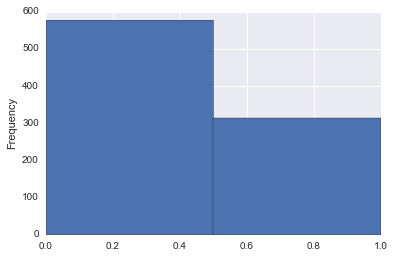

In [8]:
s_sex  = df_train["Sex"].map(sex)
s_sex.plot.hist(bins=2)

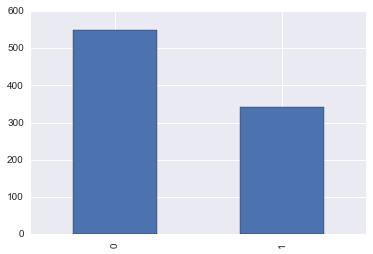

In [9]:
df_train["Survived"].value_counts().plot.bar()

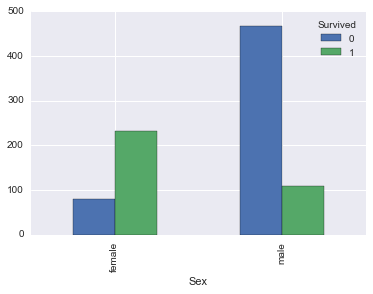

In [10]:
df_train.pivot_table(index="Sex", columns="Survived", values="PassengerId", aggfunc=len).plot.bar()

([array([ 11.,  18.,  99.,  88.,  60.,  37.,  23.,  14.,   9.,   1.]),
  array([  23.,   23.,  110.,  117.,   73.,   46.,   29.,   16.,    9.,    2.])],
 array([  1. ,   8.9,  16.8,  24.7,  32.6,  40.5,  48.4,  56.3,  64.2,
         72.1,  80. ]),
 <a list of 2 Lists of Patches objects>)

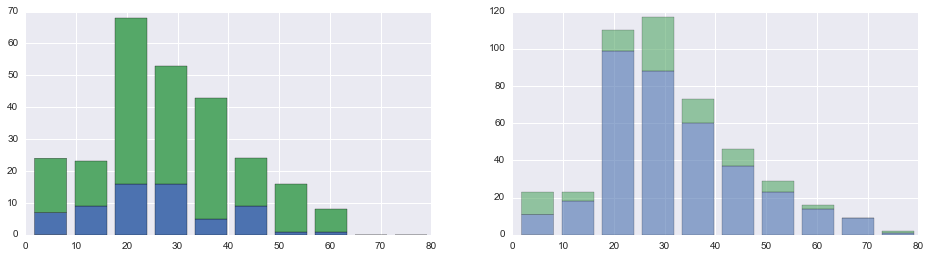

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].hist([df_train[(df_train["Sex"] == "female") & (df_train["Survived"] == 0)]["Age"],
          df_train[(df_train["Sex"] == "female") & (df_train["Survived"] == 1)]["Age"]],
         bins=10 , stacked=True, range=(1, 80))

axes[1].hist([df_train[(df_train.Survived==0) & (df_train.Sex=='male')]['Age'],
          df_train[(df_train.Survived==1) & (df_train.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

## ジェンダーモデルによる生存者推定、推定値の評価

In [12]:
x = df_train['Sex']
y = df_train['Survived']
y_pred = x.map({'female': 1, 'male': 0}).astype(int)

In [13]:
pd.concat([y.head(), y_pred.head()], axis=1)

,Survived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [14]:
accuracy_score(
    [1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1])

0.40000000000000002

In [15]:
accuracy_score(y, y_pred)

0.78675645342312006

In [16]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       549
          1       0.74      0.68      0.71       342

avg / total       0.78      0.79      0.78       891



In [17]:
cm = confusion_matrix(y, y_pred)
# True, Predict
cm_df = pd.DataFrame(cm, index=["T(0)", "T(1)"], columns=["P(0)", "P(1)"])
cm_df

,P(0),P(1)
T(0),468,81
T(1),109,233


In [19]:
cm_df.ix["T(0)"]["P(0)"] / cm_df.ix["T(0)"]["P(0)"]


1.0

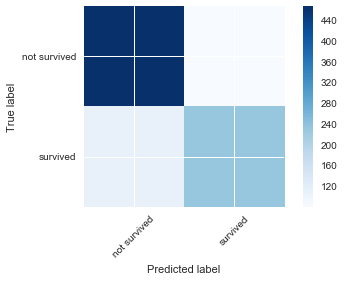

In [20]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()

plot_confusion_matrix(cm)

## 作成したkaggle_gendermodel.csvをKaggleに投稿し、スコアと順位を確認してみましょう！これで皆さんもKagglerです！

In [21]:
x_test = df_test['Sex']
y_test_pred = x_test.map({'female': 1, 'male': 0}).astype(int)

In [22]:
df_kaggle = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived':np.array(y_test_pred)})
df_kaggle.to_csv('titanic/kaggle_gendermodel.csv', index=False)
df_kaggle.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## ロジスティック回帰による生存者推定

In [23]:
iris = sns.load_dataset("iris")
iris2 = iris[["sepal_length", "sepal_width"]].copy()
iris2 = iris.loc[: , ("sepal_length", "sepal_width")]
iris2["lenght_2x"] = iris2["sepal_length"] * 2


In [24]:
pd.options.mode.chained_assignment

'warn'

In [25]:
X = df_train[['Age', 'Pclass', 'Sex']].copy()
y = df_train['Survived']

In [26]:
X['AgeFill'] = X['Age'].fillna(X['Age'].mean())

In [27]:
X['AgeFill'] = X['Age'].fillna(X['Age'].mean())
X['Gender'] = X['Sex'].map({'female': 0, 'male': 1}).astype(int)
X['Pclass_Gender'] = X['Pclass'] + X['Gender']
X.tail()


,Age,Pclass,Sex,AgeFill,Gender,Pclass_Gender
886,27.0,2,male,27.000000,1,3
887,19.0,1,female,19.000000,0,1
888,NaN,3,female,29.699118,0,3
889,26.0,1,male,26.000000,1,2
890,32.0,3,male,32.000000,1,4


In [28]:
X = X.drop(['Age'], axis=1)
X = X.drop(['Pclass', 'Sex', 'Gender'], axis=1)
X.tail()

,AgeFill,Pclass_Gender
886,27.000000,3
887,19.000000,1
888,29.699118,3
889,26.000000,2
890,32.000000,4


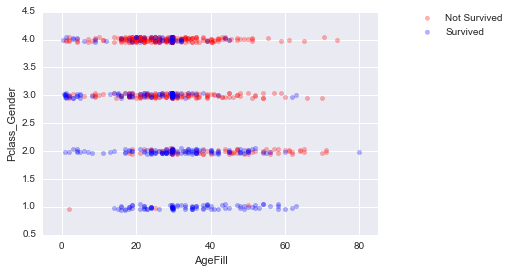

In [29]:
np.random.seed(0)

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = y[y==0].index
index_notsurvived = y[y==1].index

fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(X.loc[index_survived, 'AgeFill'],
                X.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(X.loc[index_notsurvived, 'AgeFill'],
                X.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

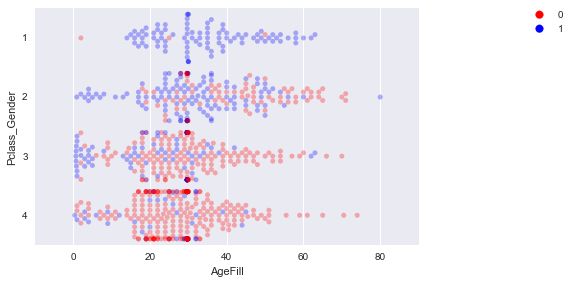

In [30]:
_sc_test = X.copy()
_sc_test.Pclass_Gender = _sc_test.Pclass_Gender.astype("category")
_sc_test["y"] = y

sns.swarmplot(x="AgeFill", y="Pclass_Gender", hue="y", data=_sc_test, alpha=0.3, palette=["red", "blue"])
plt.legend(bbox_to_anchor=(1.4, 1.03))
plt.tight_layout()

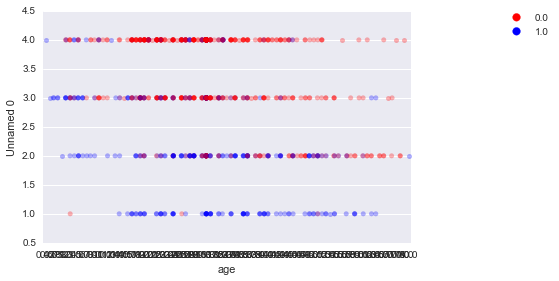

In [94]:
titanic = sns.load_dataset("titanic")
_titanic = pd.DataFrame(
    [
        titanic.age.fillna(titanic.age.mean()),
        titanic.pclass + titanic.sex.map({'female': 0, 'male': 1}).astype(int),
        titanic.survived
    ]).T
#_titanic["Unnamed 0"] = _titanic["Unnamed 0"].astype("category")
#_titanic["Unnamed 0"] = _titanic["Unnamed 0"].astype("category", categories=[4,3,2,1], ordered=False)

#sns.swarmplot(
sns.stripplot(jitter=0.1,
    data=_titanic, x="age", y="Unnamed 0", hue="survived", 
    alpha=0.3, palette=["red", "blue"])
plt.legend(bbox_to_anchor=(1.4, 1.03))
plt.tight_layout()

## トレーニングデータの分割

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)

In [33]:
X_train.tail().T

,715,767,72,235,37
AgeFill,19.0,30.5,21.0,29.699118,21.0
Pclass_Gender,4.0,3.0,3.0,3.000000,4.0


In [34]:
print('Num of Training Samples: {}'.format(len(X_train)))
print('Num of Validation Samples: {}'.format(len(X_val)))

Num of Training Samples: 712
Num of Validation Samples: 179


## ロジスティック回帰による推定

In [441]:
# 学習
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [442]:
estimated_params(clf)

['classes_', 'coef_', 'intercept_', 'n_iter_']

In [443]:
clf.coef_, clf.intercept_

(array([[-0.03756041, -1.29748813]]), array([ 4.30808898]))

In [444]:
clf.classes_, clf.n_iter_

(array([0, 1]), array([11], dtype=int32))

In [36]:
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

print('Accuracy on Training Set: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(y_val, y_val_pred)))

Accuracy on Training Set: 0.774
Accuracy on Validation Set: 0.760


In [37]:
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

[[93 13]
 [30 43]]


In [38]:
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.76      0.88      0.81       106
          1       0.77      0.59      0.67        73

avg / total       0.76      0.76      0.75       179



In [39]:
X_val
1

1

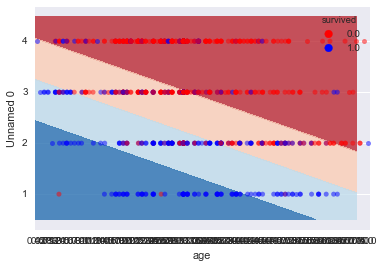

In [95]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

levels = np.linspace(0, 1.0, 5)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = sns.stripplot(jitter=0.1,
    data=_titanic, 
    x="age", y="Unnamed 0", hue="survived", 
    alpha=0.5, palette=["red", "blue"])

contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.8)
fig.colorbar(contour)

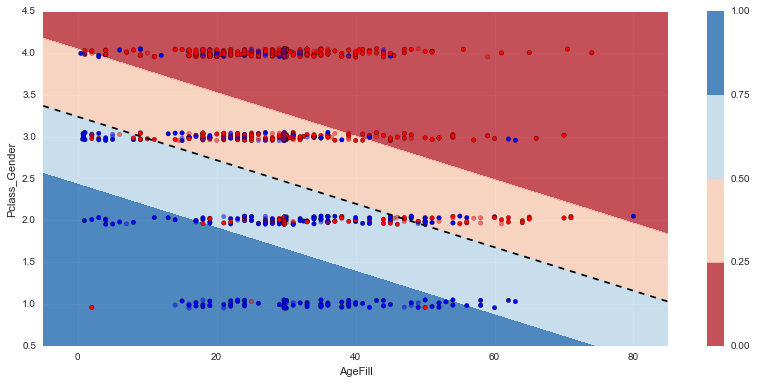

In [60]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(14, 6))
levels = np.linspace(0, 1.0, 5)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.8)
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1]+(np.random.rand(len(X_train))-0.5)*0.1, c=y_train, cmap=cm_bright)
ax.scatter(X_val.iloc[:, 0], X_val.iloc[:, 1]+(np.random.rand(len(X_val))-0.5)*0.1, c=y_val, cmap=cm_bright, alpha=0.5)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(clf.intercept_[0]+clf.coef_[0][0]*xmin)/clf.coef_[0][1]
y2 = -1*(clf.intercept_[0]+clf.coef_[0][0]*xmax)/clf.coef_[0][1]
ax.plot([xmin, xmax] ,[y1, y2], 'k--')

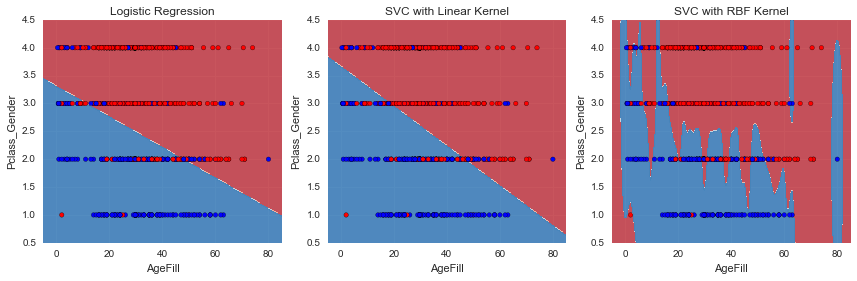

In [96]:
clf_log = LogisticRegression()
clf_svc_lin = SVC(kernel='linear', probability=True)
clf_svc_rbf = SVC(kernel='rbf', probability=True)
titles = ['Logistic Regression', 'SVC with Linear Kernel', 'SVC with RBF Kernel',]

h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

fig, axes = plt.subplots(1, 3, figsize=(12,4))
levels = np.linspace(0, 1.0, 5)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
for i, clf in enumerate((clf_log, clf_svc_lin, clf_svc_rbf)):
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.8)
    axes[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cm_bright)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('AgeFill')
    axes[i].set_ylabel('Pclass_Gender')
    axes[i].set_xlim(xmin, xmax)
    axes[i].set_ylim(ymin, ymax)
    fig.tight_layout()

## over fitting

In [446]:
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)

(0.80758426966292129, 0.7988826815642458)

In [447]:
estimated_params(clf)

['class_weight_',
 'classes_',
 'coef_',
 'dual_coef_',
 'fit_status_',
 'intercept_',
 'n_support_',
 'probA_',
 'probB_',
 'shape_fit_',
 'support_',
 'support_vectors_']

## cross validation

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=33)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)

(0.7837078651685393, 0.74301675977653636)

In [100]:
def cross_val(clf, X, y, K, random_state=0):
    cv = KFold(len(y), K, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv)
    return scores

In [101]:
clf = LogisticRegression()
scores = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.80446927  0.74719101  0.80337079  0.74719101  0.76966292]
Mean Score: 0.774 (+/-0.051)


In [137]:
(train_test_split([1,2,3,4], [5,6,7,8], train_size=0.5))

[[3, 2], [4, 1], [7, 6], [8, 5]]

In [117]:
(train_test_split([1,2,3,4], [5,6,7,8], train_size=0.5, random_state=33))

[[4, 1], [2, 3], [8, 5], [6, 7]]

In [198]:
shuffled = np.array(range(9))
np.random.shuffle(shuffled)
shuffled

array([7, 3, 1, 5, 4, 8, 2, 0, 6])

In [219]:
random_state = np.random.RandomState(seed=0)
random_state.shuffle(shuffled)
shuffled

array([0, 1, 3, 4, 6, 2, 5, 7, 8])

In [221]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
KFold(len(y), 5, shuffle=True, random_state=random_state)

sklearn.cross_validation.KFold(n=891, n_folds=5, shuffle=True, random_state=<mtrand.RandomState object at 0x1201d8438>)

In [223]:
# http://scikit-learn.org/stable/modules/cross_validation.html
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html
cross_val_score(LogisticRegression(), X, y, cv=5)

array([ 0.7150838 ,  0.75418994,  0.82022472,  0.79213483,  0.79661017])

In [238]:
kf = KFold(len(y), 5, shuffle=True, random_state=random_state)
print(kf, "\n")
for i, (kf_train, kf_test) in enumerate(kf):
    print(i)
    print(kf_train)
    print(kf_test)
    

sklearn.cross_validation.KFold(n=891, n_folds=5, shuffle=True, random_state=<mtrand.RandomState object at 0x1201d8438>) 

0
[  0   1   2   3   5   6   8   9  10  11  12  13  14  15  17  19  20  21
  23  25  26  27  28  29  32  34  35  36  39  40  41  42  43  44  47  48
  49  51  52  53  54  55  56  57  58  59  60  62  65  68  69  71  73  74
  75  77  78  79  80  81  82  84  86  87  88  89  90  92  93  94  97  98
  99 100 101 102 103 106 107 108 109 110 113 114 115 116 117 119 120 122
 123 124 125 127 128 129 130 131 132 133 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 174 175 176 180 182 183 185 186
 187 188 189 190 191 192 193 194 196 197 198 199 200 202 203 205 206 207
 211 212 213 214 215 216 217 218 219 220 222 223 224 225 226 228 229 230
 231 232 233 234 235 236 238 239 240 241 243 244 245 246 247 248 249 251
 252 253 254 255 256 257 258 259 260 262 263 264 265 267 268 269 270 271


In [228]:
from sklearn.cross_validation import StratifiedKFold
StratifiedKFold(y, 5, shuffle=True, random_state=random_state)

sklearn.cross_validation.StratifiedKFold(labels=[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1

In [232]:
skf_x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
skf_y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(skf_y, n_folds=2)
len(skf)

print(skf)  


for train_index, test_index in skf:
    print("TRAIN:", train_index, "TEST:", test_index)
    skf_X_train, skf_X_test = skf_x[train_index], skf_x[test_index]
    skf_y_train, skf_y_test = skf_y[train_index], skf_y[test_index]

sklearn.cross_validation.StratifiedKFold(labels=[0 0 1 1], n_folds=2, shuffle=False, random_state=None)
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


In [222]:
cross_val_score?

In [454]:
# http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html#cross-validated-estimators
from sklearn.linear_model import LogisticRegressionCV
#help(LogisticRegressionCV)

In [455]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = LabelEncoder()
labels = pd.Series(list("acb") * 5)
#le.fit(labels)
le.fit_transform(labels), le.transform(labels), le.inverse_transform([0,1,2])

(array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1]),
 array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1]),
 array(['a', 'b', 'c'], dtype=object))

In [261]:
le.fit_transform(labels)

array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1])

In [449]:
estimated_params(le), le.classes_

(['classes_'], array(['female', 'male'], dtype=object))

In [258]:
classes = {k: v for k, v in enumerate(le.classes_)}
le.classes_, le.classes_.__class__, classes

(array(['a', 'b', 'c'], dtype=object), numpy.ndarray, {0: 'a', 1: 'b', 2: 'c'})

In [269]:
X = df_train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].copy()
y = df_train['Survived'].copy()
X_test = df_test[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].copy()

X['AgeFill'] = X['Age'].fillna(X['Age'].mean())
X_test['AgeFill'] = X_test['Age'].fillna(X['Age'].mean())
X = X.drop(['Age'], axis=1)
X_test = X_test.drop(['Age'], axis=1)

le = LabelEncoder()
le.fit(X['Sex'])
X['Gender'] = le.transform(X['Sex'])
X_test['Gender'] = le.transform(X_test['Sex'])

X = X.join(pd.get_dummies(X['Embarked'], prefix='Embarked'))
X_test = X_test.join(pd.get_dummies(X['Embarked'], prefix='Embarked'))
X = X.drop(['Sex', 'Embarked'], axis=1)
X_test = X_test.drop(['Sex', 'Embarked'], axis=1)

X.tail()

,Pclass,SibSp,Parch,AgeFill,Gender,Embarked_C,Embarked_Q,Embarked_S
886,2,0,0,27.000000,1,0.0,0.0,1.0
887,1,0,0,19.000000,0,0.0,0.0,1.0
888,3,1,2,29.699118,0,0.0,0.0,1.0
889,1,0,0,26.000000,1,1.0,0.0,0.0
890,3,0,0,32.000000,1,0.0,1.0,0.0


In [270]:
clf = LogisticRegression()
scores = cross_val(clf, X, y, 5)
scores, scores.mean(), scores.std()*2

(array([ 0.79329609,  0.78089888,  0.80337079,  0.81460674,  0.80337079]),
 0.79910865607934212,
 0.022661053339677807)

In [450]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
scores = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.78212291  0.76404494  0.79213483  0.78089888  0.7247191 ]
Mean Score: 0.769 (+/-0.048)


In [452]:
estimated_params(clf)

['classes_',
 'feature_importances_',
 'max_features_',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'tree_']

In [451]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
#tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

tree_clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

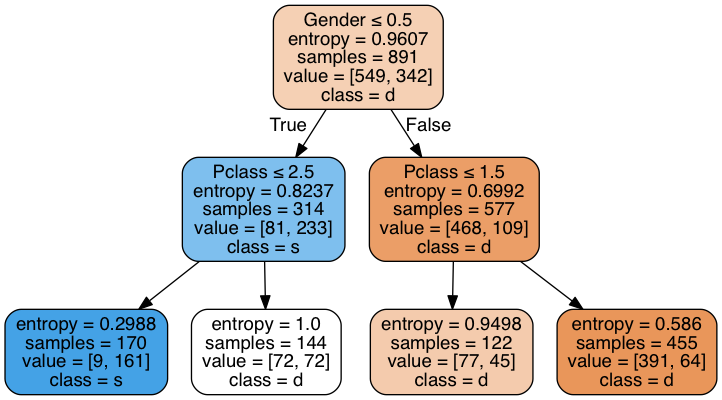

In [351]:
from sklearn.externals.six import StringIO as SkStringIO
from IPython.display import Image
import graphviz

def tree_plot(decision_tree, width=500, height=500, max_depth=None,
         feature_names=None, class_names=None, label='all',
         filled=False, leaves_parallel=False, impurity=True,
         node_ids=False, proportion=False, rotate=False,
         rounded=False, special_characters=False):
    in_memory_dot_file = SkStringIO()
    export_graphviz(
            decision_tree, out_file=in_memory_dot_file, max_depth=max_depth,
            feature_names=feature_names, class_names=class_names, label=label,
            filled=filled, leaves_parallel=leaves_parallel, impurity=impurity,
            node_ids=node_ids, proportion=proportion, rotate=rotate,
            rounded=rounded, special_characters=special_characters)
    src = graphviz.Source(in_memory_dot_file.getvalue())
    return Image(src.pipe(format='png'), height=height, width=width)

tree_plot(tree_clf,
#tree_plot(clf,
    feature_names=X.columns,  
#    class_names=["0", "1"],
    class_names=["d", "s"],
#    class_names={1: "s", 0: "d"},
#    class_names=list(y.apply(str)),
    filled=True,
    rounded=True,
    special_characters=True
) 


In [334]:
X_y = pd.concat([X, y], axis=1)
t1 = X_y[X_y.Gender <= 0.5]
t1[t1.Pclass <= 2.5].Survived.value_counts()


1    161
0      9
Name: Survived, dtype: int64

In [335]:
t1[t1.Pclass > 2.5].Survived.value_counts()


1    72
0    72
Name: Survived, dtype: int64

In [336]:
f1 = X_y[X_y.Gender > 0.5]
f1[f1.Pclass <= 1.5].Survived.value_counts()

0    77
1    45
Name: Survived, dtype: int64

In [337]:
f1[f1.Pclass > 1.5].Survived.value_counts()

0    391
1     64
Name: Survived, dtype: int64

In [436]:
estimated_params(tree_clf)

['classes_',
 'feature_importances_',
 'max_features_',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'tree_']

In [429]:
tree_clf.classes_, tree_clf.feature_importances_

(array([0, 1]),
 array([ 0.30417882,  0.        ,  0.        ,  0.        ,  0.69582118,
         0.        ,  0.        ,  0.        ]))

In [430]:
tree_clf.max_features_, tree_clf.n_classes_

(8, 2)

In [432]:
tree_clf.n_features_, tree_clf.n_outputs_

(8, 1)

In [431]:
tree_clf.tree_

In [311]:
from sklearn.externals.six import StringIO as SkStringIO
from io import StringIO as SkStringIO
import pydot 
from IPython.display import Image
dot_data = SkStringIO()
export_graphviz(
    tree_clf, out_file=dot_data,  
    feature_names=X.columns,  
    class_names=y.unique(),
    filled=True, rounded=True,  
    special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#print(dot_data.getvalue())


TypeError: startswith first arg must be str or a tuple of str, not bytes

## グリッドサーチ
グリッドサーチは、分類器のパラメータを指定した範囲で変化させ、最もスコアの高いパラメータの組合せを探してくれる便利な機能です。

In [352]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}
cv = KFold(len(y), 5, shuffle=True, random_state=0)

grid_search = GridSearchCV(clf, param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=891, n_folds=5, shuffle=True, random_state=0),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [437]:
estimated_params(grid_search)

['best_estimator_', 'best_params_', 'best_score_', 'grid_scores_', 'scorer_']

In [420]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [419]:
grid_search.best_score_, grid_search.best_params_

[0.81705948372615034, {'max_depth': 4, 'min_samples_leaf': 3}]

In [438]:
grid_search.scorer_

<function sklearn.metrics.scorer._passthrough_scorer>

In [356]:
grid_search.grid_scores_

[mean: 0.76880, std: 0.02381, params: {'max_depth': 2, 'min_samples_leaf': 2},
 mean: 0.76880, std: 0.02381, params: {'max_depth': 2, 'min_samples_leaf': 3},
 mean: 0.76880, std: 0.02381, params: {'max_depth': 2, 'min_samples_leaf': 4},
 mean: 0.76880, std: 0.02381, params: {'max_depth': 2, 'min_samples_leaf': 5},
 mean: 0.80471, std: 0.01474, params: {'max_depth': 3, 'min_samples_leaf': 2},
 mean: 0.80584, std: 0.01686, params: {'max_depth': 3, 'min_samples_leaf': 3},
 mean: 0.80584, std: 0.01686, params: {'max_depth': 3, 'min_samples_leaf': 4},
 mean: 0.80584, std: 0.01686, params: {'max_depth': 3, 'min_samples_leaf': 5},
 mean: 0.81594, std: 0.01180, params: {'max_depth': 4, 'min_samples_leaf': 2},
 mean: 0.81706, std: 0.01391, params: {'max_depth': 4, 'min_samples_leaf': 3},
 mean: 0.81257, std: 0.01345, params: {'max_depth': 4, 'min_samples_leaf': 4},
 mean: 0.80808, std: 0.01750, params: {'max_depth': 4, 'min_samples_leaf': 5},
 mean: 0.80247, std: 0.01421, params: {'max_depth': 

In [382]:
{"a": 1, "b": 2}.values()

dict_values([1, 2])

In [410]:
gs_df = pd.DataFrame(grid_search.grid_scores_)
params_df = gs_df.parameters.apply(
    lambda p: pd.Series(list(p.values()), p.keys()))
pd.concat([
    gs_df.drop(["parameters", "cv_validation_scores"], axis=1),
    params_df
], axis=1).head(2)


,mean_validation_score,max_depth,min_samples_leaf
0,0.768799,2,2
1,0.768799,2,3


In [371]:
s = pd.Series(["k:v", "k1:v1"])
s.str.split(":", expand=True)

,0,1
0,k,v
1,k1,v1


In [418]:
pd.concat([
    s.apply(lambda x: pd.Series(x.split(":"), index=['col1', 'col2'])),
    s.apply(lambda x: (x.split(":")))
], axis=1)

,col1,col2,0
0,k,v,"[k, v]"
1,k1,v1,"[k1, v1]"


In [415]:
series = pd.Series([20, 21, 12], index=['London', 'New York','Helsinki'])
pd.DataFrame([series, series])

,London,New York,Helsinki
0,20,21,12
1,20,21,12


In [395]:
pd.Series(list("abc")).str.split

<bound method StringMethods.split of <pandas.core.strings.StringMethods object at 0x11e82b438>>

In [414]:
y_test_pred = grid_search.predict(X_test)
grid_search.predict

<function sklearn.grid_search.BaseSearchCV.predict>